# Title - Nigeria COVID-19 Data Analysis using Python 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

### Webscraping using pandas pd.read_csv

In [2]:
df = pd.read_csv('covidnig.csv')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [3]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


## Data Cleaning & Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [5]:
# Remove the comma in No. of Cases (Lab Confirmed) column
df['No. of Cases (Lab Confirmed)'] = df['No. of Cases (Lab Confirmed)'].str.replace(',','')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,"2,435","24,037",236
1,FCT,9627,"2,840","6,694",93
2,Kaduna,4504,579,"3,877",48
3,Plateau,4262,280,"3,948",34
4,Oyo,3788,368,"3,374",46
5,Rivers,3279,232,"2,987",60
6,Edo,2768,52,"2,603",113
7,Ogun,2382,174,"2,175",33
8,Kano,2032,198,"1,778",56
9,Delta,1843,57,"1,737",49


In [6]:
# Remove the comma in No. of Cases (on admission) column
df['No. of Cases (on admission)']=df['No. of Cases (on admission)'].str.replace(',','')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,"24,037",236
1,FCT,9627,2840,"6,694",93
2,Kaduna,4504,579,"3,877",48
3,Plateau,4262,280,"3,948",34
4,Oyo,3788,368,"3,374",46
5,Rivers,3279,232,"2,987",60
6,Edo,2768,52,"2,603",113
7,Ogun,2382,174,"2,175",33
8,Kano,2032,198,"1,778",56
9,Delta,1843,57,"1,737",49


In [7]:
# Remove the comma in No. of Cases (on admission) column
df['No. Discharged']=df['No. Discharged'].str.replace(',','')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


Convert all the column objects to integer

In [9]:
#Convert No. of Cases (Lab Confirmed) object to integer
df['No. of Cases (Lab Confirmed)'] = df['No. of Cases (Lab Confirmed)'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 1.4+ KB


In [10]:
#Convert No. of Cases (on admission) object to integer
df['No. of Cases (on admission)'] = df['No. of Cases (on admission)'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 1.3+ KB


In [11]:
#Convert No. Discharged object to integer
df['No. Discharged'] = df['No. Discharged'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ KB


In [12]:
df.head(7)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113


In [13]:
#Check the number of rows and columns present in the data using the shape attribute.
df.shape

(37, 5)

In [14]:
df.shape[0]

37

In [15]:
df.shape[1]

5

There are 37 rows and 5 columns

In [16]:
#Rename columns
df.rename(columns={'States Affected': 'States', 
                    'No. of Cases (Lab Confirmed)': 'Confirmed cases',
                    'No. of Cases (on admission)': 'Admitted cases',
                    'No. Discharged':'Recovered cases',
                    'No. of Deaths':'Death'}, inplace= True)
df.head()


,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [17]:
df.tail(3)

,States,Confirmed cases,Admitted cases,Recovered cases,Death
34,Cross River,93,1,81,11
35,Zamfara,79,1,73,5
36,Kogi,5,0,3,2


In [18]:
#Use describe function to generate the statistical summary of the dataframe
df.describe()

,Confirmed cases,Admitted cases,Recovered cases,Death
count,37.000000,37.000000,37.000000,37.000000
mean,2119.837838,240.810811,1846.027027,33.000000
std,4537.417740,595.255773,4009.464785,41.797794
min,5.000000,0.000000,3.000000,2.000000
25%,381.000000,25.000000,300.000000,11.000000
50%,897.000000,57.000000,775.000000,21.000000
75%,1843.000000,183.000000,1737.000000,36.000000
max,26708.000000,2840.000000,24037.000000,236.000000


Comment:
* The least death recorded is 2 while the highest death recorded is 236 and the average is 33
* The highest Confirmed cases is 26708 and the least is 5 while the average corfirmed case is approximately 2120
* The highest admitted cases recorded is 2840 and the average recorded is 241 approximately 
* Admitted cases took place everyday
* Higheset number of patients recover is 24037
* Average number of covid19 deaths across all states in Nigeria is 33
* Highest number of deaths recorded in a state is 236 and minimum is 4.
* 75% of death cases is 36 deaths while 25% of death cases result 11.

In [19]:
# Extract the average of discharged
df['Recovered cases'].mean()

1846.027027027027

In [20]:
# Extract the highest number of discharged
df['Recovered cases'].max()

24037

In [21]:
# Extract the least number of discharged
df['Recovered cases'].min()

3

In [22]:
# Extract the middle number of discharged
df['Recovered cases'].median()

775.0

In [23]:
#Extract the average Admitted cases
df['Admitted cases'].mean()

240.8108108108108

In [24]:
#Extract the median of No. of Cases (on admission)
df['Admitted cases'].median()

57.0

In [25]:
#Maximum std
df.std().max()

C:\Users\user\AppData\Local\Temp\ipykernel_1148\2203905562.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std().max()


4537.417740383924

In [26]:
# Use of correct method to check for Missing values
df.isna().sum()

States             0
Confirmed cases    0
Admitted cases     0
Recovered cases    0
Death              0
dtype: int64

Comment:
* From the above result, there is no missing value

In [27]:
df.dtypes

States             object
Confirmed cases     int32
Admitted cases      int32
Recovered cases     int32
Death               int64
dtype: object

In [28]:
#Extract only the standard deviation
df.std()

C:\Users\user\AppData\Local\Temp\ipykernel_1148\1819305370.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Confirmed cases    4537.417740
Admitted cases      595.255773
Recovered cases    4009.464785
Death                41.797794
dtype: float64

In [29]:
#Extract the highest standard deviation
df.std().max()

C:\Users\user\AppData\Local\Temp\ipykernel_1148\4293289352.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std().max()


4537.417740383924

Confirmed cases has the highest standard deviation

In [30]:
#Confirmed cases has the least standard deviation
df.std().min()

C:\Users\user\AppData\Local\Temp\ipykernel_1148\2696585765.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std().min()


41.79779366851264

Death cases has the least standard deviation

In [31]:
#The top 5 highest number of death
df.nlargest(5, 'Death')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56


In [32]:
#The top 5 smallest number of death
df.nsmallest(5, 'Death')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
36,Kogi,5,0,3,2
35,Zamfara,79,1,73,5
24,Ekiti,405,24,375,6
31,Taraba,203,19,177,7
32,Yobe,164,33,123,8


In [33]:
#The top 5 highest number of gross income
df.nlargest(5, 'Confirmed cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [34]:
#The top 7 smallest number of Admitted cases
df.nsmallest(7, 'Admitted cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
36,Kogi,5,0,3,2
34,Cross River,93,1,81,11
35,Zamfara,79,1,73,5
33,Kebbi,143,5,130,8
29,Anambra,299,6,274,19
31,Taraba,203,19,177,7
17,Osun,979,20,937,22


In [35]:
#The top 5 highest number of Admitted cases
df.nlargest(7, 'Admitted cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
1,FCT,9627,2840,6694,93
0,Lagos,26708,2435,24037,236
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
3,Plateau,4262,280,3948,34
21,Nasarawa,600,262,325,13
5,Rivers,3279,232,2987,60


In [36]:
#Extract how many patients died where death record cases is less than 50
death = df['Death'] > 100
print('There are {} patients died'.format(death.sum()))

There are 2 patients died


In [37]:
df[df['Death'] < 50]

,States,Confirmed cases,Admitted cases,Recovered cases,Death
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
7,Ogun,2382,174,2175,33
9,Delta,1843,57,1737,49
10,Ondo,1793,62,1690,41
11,Katsina,1405,214,1167,24
12,Enugu,1376,34,1321,21
13,Kwara,1296,171,1094,31
14,Gombe,1164,183,950,31


In [38]:
#Extract how many patients died where death record cases is less than 50
dis = df['Recovered cases'] > 2000
print('There are {} patients discharged'.format(dis.sum()))

There are 8 patients discharged


In [39]:
#Extract the information of patients whose number of discharged is above 2000 
df[df['Recovered cases'] > 2000]

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33


In [40]:
#Extract number of Discharged across different states
df[['States', 'Recovered cases']].head(8)

,States,Recovered cases
0,Lagos,24037
1,FCT,6694
2,Kaduna,3877
3,Plateau,3948
4,Oyo,3374
5,Rivers,2987
6,Edo,2603
7,Ogun,2175


In [41]:
#Accessing death records for first 5 states
df.loc[0:4,['Death', 'States']]

,Death,States
0,236,Lagos
1,93,FCT
2,48,Kaduna
3,34,Plateau
4,46,Oyo


### Unique Values in Columns

In [42]:
#Generate the names of the columns using the columns attribute
df.columns

Index(['States', 'Confirmed cases', 'Admitted cases', 'Recovered cases',
       'Death'],
      dtype='object')

In [43]:
for i in df.columns:
    print(i)

States
Confirmed cases
Admitted cases
Recovered cases
Death


In [44]:
#Generated the count figure of the States values using the tolist method.
df['States'].unique().tolist()

['Lagos',
 'FCT',
 'Kaduna',
 'Plateau',
 'Oyo',
 'Rivers',
 'Edo',
 'Ogun',
 'Kano',
 'Delta',
 'Ondo',
 'Katsina',
 'Enugu',
 'Kwara',
 'Gombe',
 'Ebonyi',
 'Abia',
 'Osun',
 'Bauchi',
 'Borno',
 'Imo',
 'Nasarawa',
 'Benue',
 'Bayelsa',
 'Ekiti',
 'Akwa Ibom',
 'Jigawa',
 'Niger',
 'Adamawa',
 'Anambra',
 'Sokoto',
 'Taraba',
 'Yobe',
 'Kebbi',
 'Cross River',
 'Zamfara ',
 'Kogi']

In [45]:
print("There are {} affected states". format(len(df['States'].unique().tolist())))

There are 37 affected states


In [46]:
#Print out the death recorde for each state
print(df['Death'].unique())

[236  93  48  34  46  60 113  33  56  49  41  24  21  31  30  10  22  14
  36  12  13  11   6   9  19  17   7   8   5   2]


### Aggregation with GroupBy

In [47]:
df.groupby('States').agg(['sum', 'mean']).head()

Confirmed cases        Admitted cases        Recovered cases         \
                      sum   mean            sum   mean             sum   mean   
States                                                                          
Abia                  980  980.0             25   25.0             945  945.0   
Adamawa               355  355.0             96   96.0             238  238.0   
Akwa Ibom             395  395.0             44   44.0             342  342.0   
Anambra               299  299.0              6    6.0             274  274.0   
Bauchi                897  897.0            108  108.0             775  775.0   

          Death        
            sum  mean  
States                 
Abia         10  10.0  
Adamawa      21  21.0  
Akwa Ibom     9   9.0  
Anambra      19  19.0  
Bauchi       14  14.0

## Data Visualization

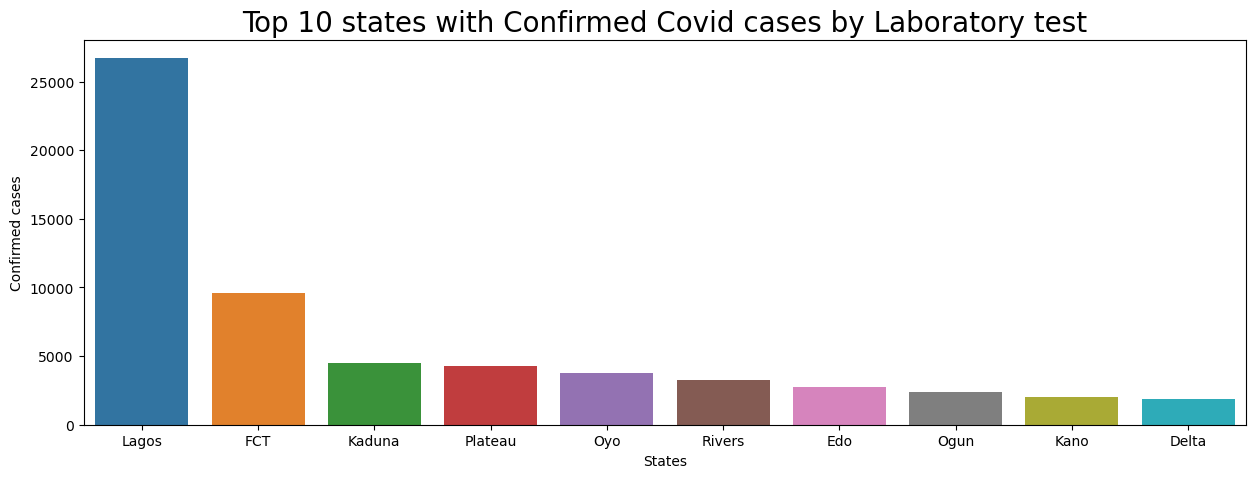

In [48]:
df = df.sort_values(by=['Confirmed cases'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Confirmed cases', data = df).set_title("Top 10 states with Confirmed Covid cases by Laboratory test", fontdict = { 'fontsize': 20});

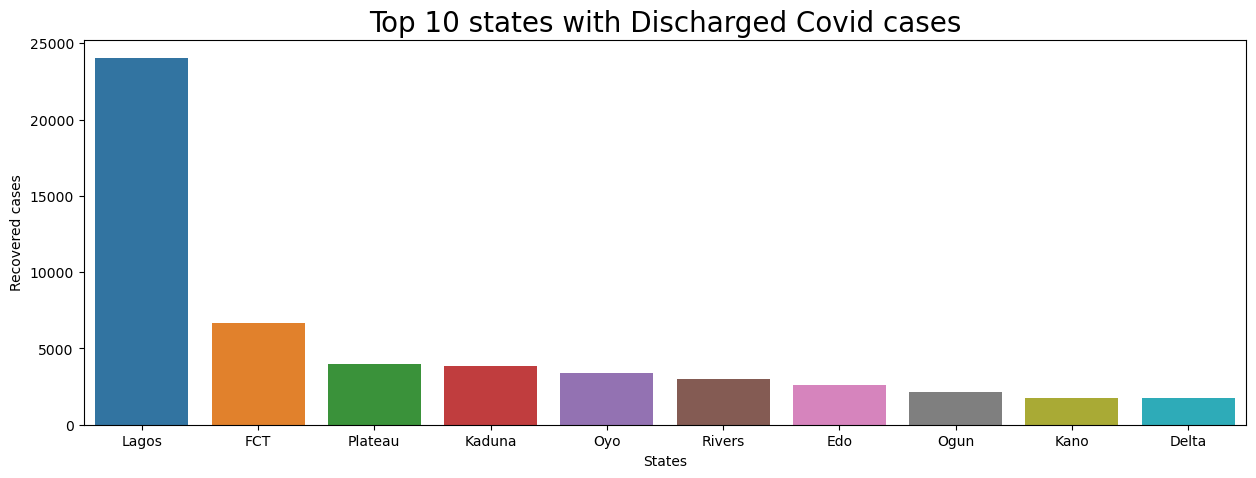

In [49]:
df = df.sort_values(by=['Recovered cases'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Recovered cases', data = df).set_title("Top 10 states with Discharged Covid cases", fontdict = { 'fontsize': 20});


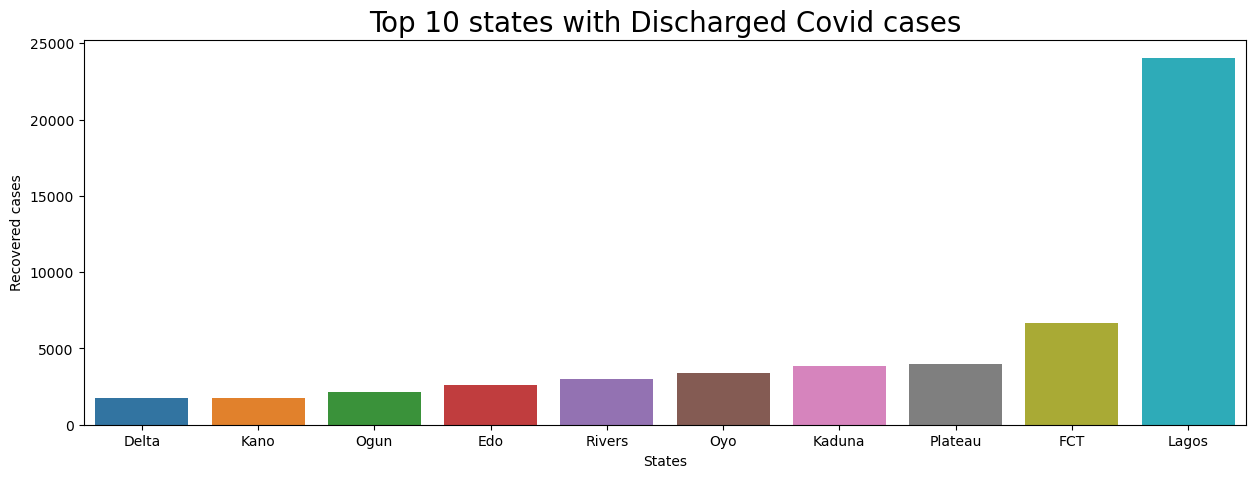

In [50]:
df = df.sort_values(by=['Recovered cases']).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Recovered cases', data = df).set_title("Top 10 states with Discharged Covid cases", fontdict = { 'fontsize': 20});


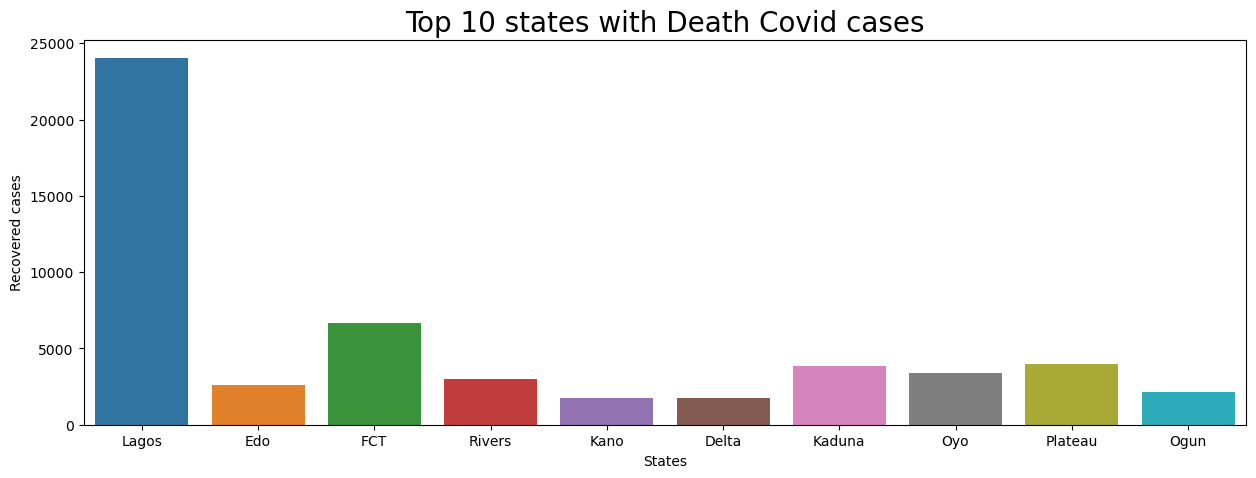

In [51]:
df = df.sort_values(by=['Death'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Recovered cases', data = df).set_title("Top 10 states with Death Covid cases", fontdict = { 'fontsize': 20});

* Lagos has the highest number of discharged patient with close to 25000 while the Drlta and Kano had the least discharged patients with less than 3000
* Abuja is the second highest number of discharged patients with more than 5000 but less than 10000

### Line plot for the total confirmed, recovered and death cases daily in Nigeria

Text(0.5, 1.0, 'Scatter Plot of Admitted Cases and Confirmed Cases.')

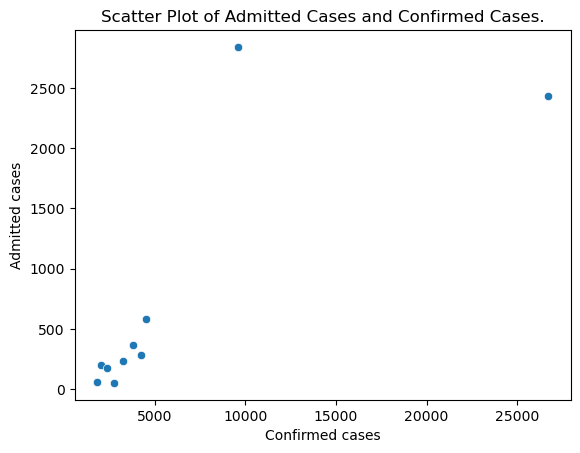

In [52]:
#Plot scatter plot between mean area and mean smoothness
sns.scatterplot(x = 'Confirmed cases', y = 'Admitted cases', data = df)
plt.title('Scatter Plot of Admitted Cases and Confirmed Cases.')

* Number of Admitted cases raise to over 2500 while Number of Confirmed Cases raise to over 25,000

Text(0.5, 1.0, 'Scatter Plot of Death Cases and Confirmed Cases.')

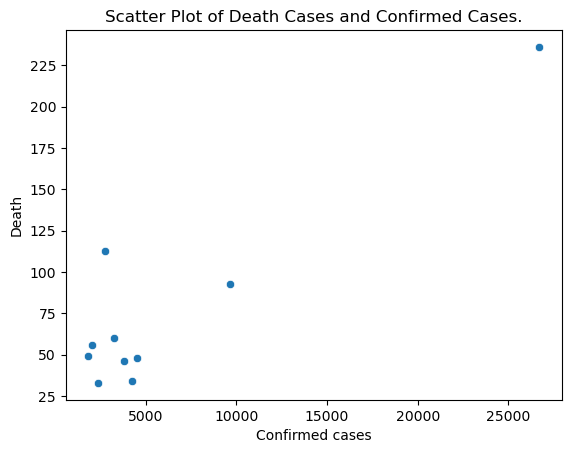

In [53]:
#Plot scatter plot between mean area and mean smoothness
sns.scatterplot(x = 'Confirmed cases', y = 'Death', data = df)
plt.title('Scatter Plot of Death Cases and Confirmed Cases.')

Text(0.5, 1.0, 'Scatter Plot of Death Cases and the Corresponding States.')

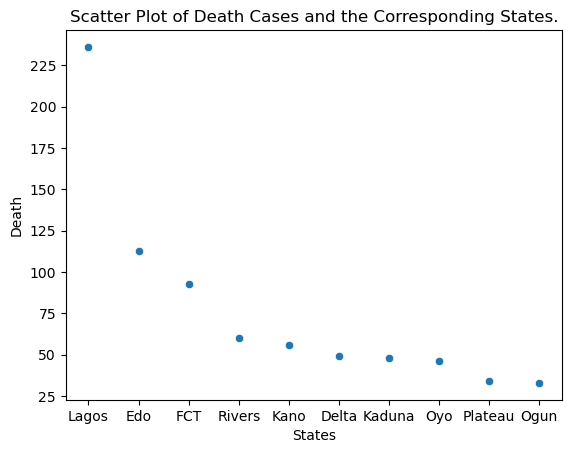

In [54]:
#Plot scatter plot between mean area and mean smoothness
sns.scatterplot(x = 'States', y = 'Death', data = df)
plt.title('Scatter Plot of Death Cases and the Corresponding States.')

From the graph above result, it is shown that Lagos highest number of death record of more 225 follow by Edo with more than 100 but less than 125 while both Plateau and Ogun recorded less record of death below 50

Text(0.5, 1.0, 'Scatter Plot of Admitted Cases and the Corresponding States.')

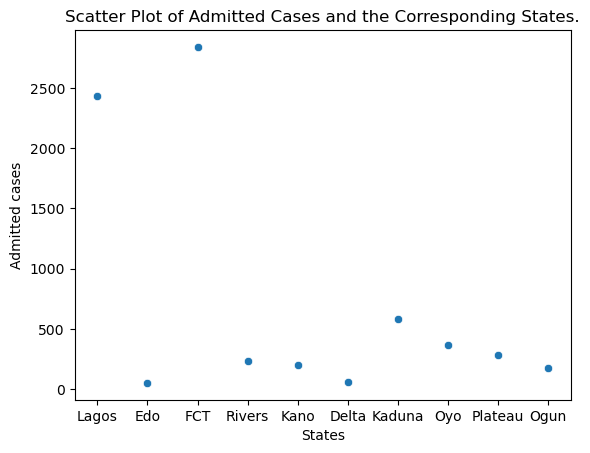

In [55]:
#Plot scatter plot between mean area and mean smoothness
sns.scatterplot(x = 'States', y = 'Admitted cases', data = df)
plt.title('Scatter Plot of Admitted Cases and the Corresponding States.')

The Scatter graph above shows that FCT recorded the highest number of admission case of more than 2500 patients while Edo and Delta had below 250 patients recorded

### Correlation between the columns

In [56]:
df.corr()

,Confirmed cases,Admitted cases,Recovered cases,Death
Confirmed cases,1.000000,0.790451,0.995709,0.914463
Admitted cases,0.790451,1.000000,0.730416,0.667474
Recovered cases,0.995709,0.730416,1.000000,0.917478
Death,0.914463,0.667474,0.917478,1.000000


<AxesSubplot:>

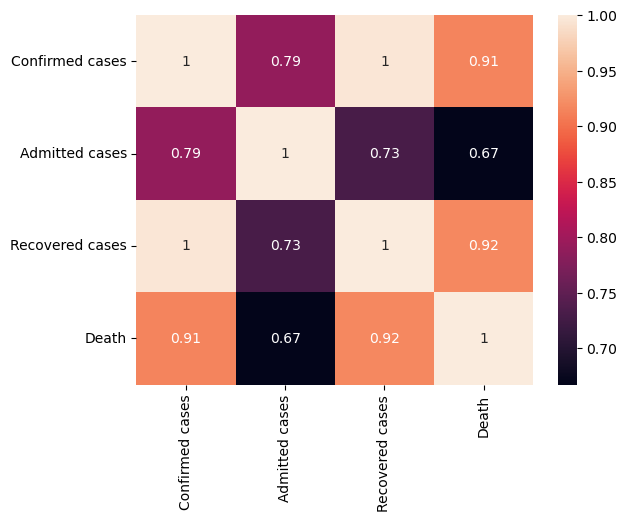

In [57]:
sns.heatmap(df.corr(), annot=True)

There is a high correlation coefficient between:
   * Death and Confirmed cases, correlation coefficient is 0.91
   * Recovered cases and Confirmed cases, correlation coefficient is 1 
   * Recovered cases and Death cases, correlation coefficient is 0.92
   * Admitted cases and Confirmed cases, correlation coefficient is 0.79
   * Confirmed cases to Confirmed cases, correlation coefficient is 1
   * Death cases to Death cases, correlation coefficient is 1
   * Recovered cases to Recovered cases, correlation coefficient is 1 
   * Admitted cases and Admitted cases, correlation coefficient is 1

   * Low correlation coefficient between Admitted cases and Death cases, correlation coefficient is 0.67

In [58]:
#plt.figure(figsize=(6, 6))
#sns.heatmap(df.corr(), annot=True)

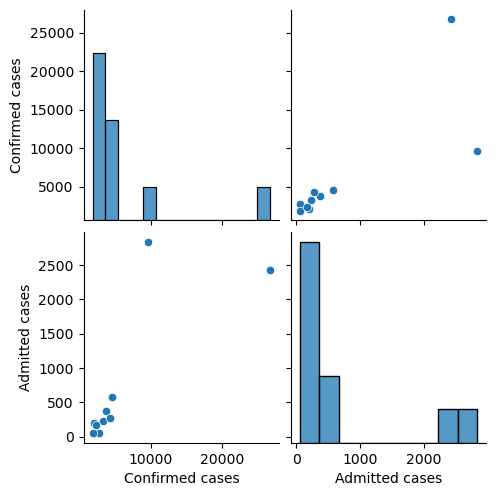

In [59]:
# Plot the pairplot
sns.pairplot(df, vars=['Confirmed cases', 'Admitted cases'])

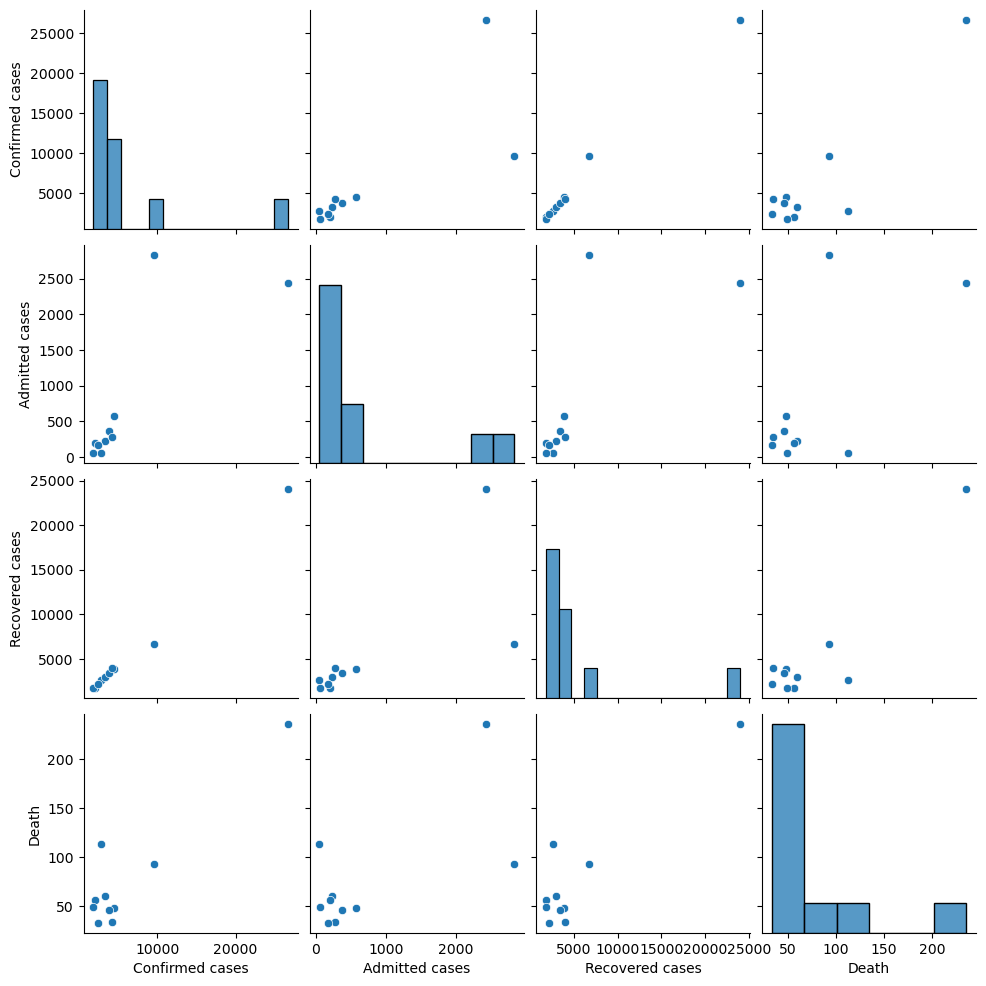

In [60]:
# Plot the pairplot
sns.pairplot(df, vars=['Confirmed cases', 'Admitted cases', 'Recovered cases', 'Death'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Death', ylabel='Density'>

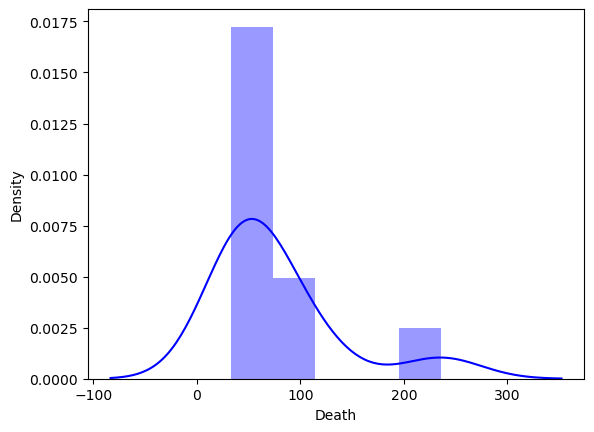

In [61]:
#Distribution plot
sns.distplot(df['Death'],bins = 5, color = 'blue')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Confirmed cases', ylabel='Density'>

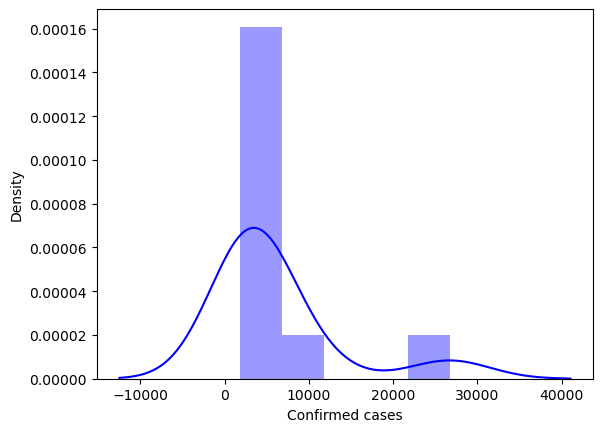

In [62]:
#Distribution plot
sns.distplot(df['Confirmed cases'],bins = 5, color = 'blue')

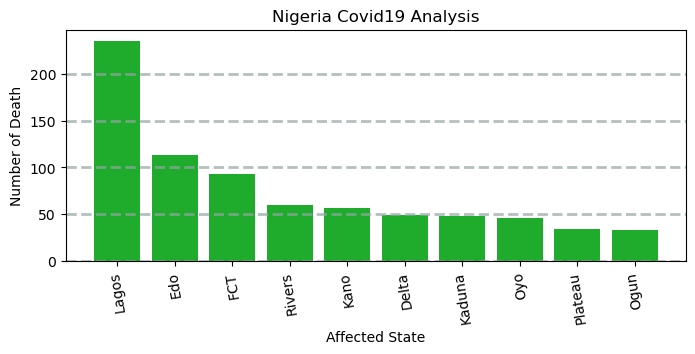

In [63]:
# Create a Figure
fig = plt.figure(figsize=(8, 3))

# Create a bar plot of name vs grade
plt.bar(x=df['States'], height=df['Death'], color='#1fab2c')

# Customize the chart
plt.title('Nigeria Covid19 Analysis')
plt.xlabel('Affected State')
plt.ylabel('Number of Death')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=99)
plt.show()

Comments:
* From the bar chart above, it is shown that:
    * Lagos state has the highest number of death rate while Ogun state has the least 

C:\Users\user\AppData\Local\Temp\ipykernel_1148\4074861645.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


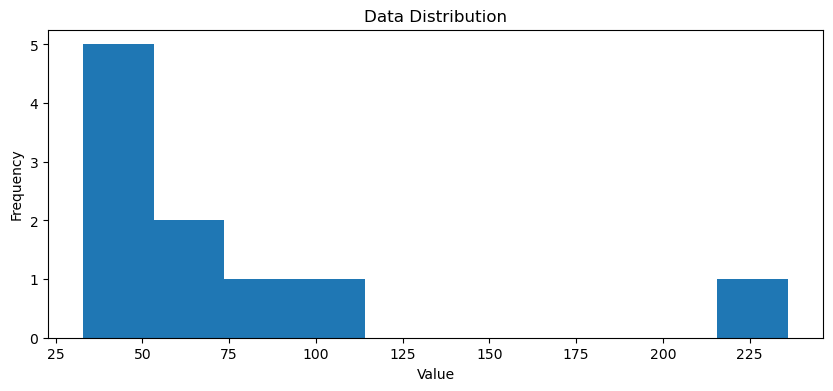

In [64]:
# Get the variable to examine
var_data = df['Death']

# Create a Figure
fig = plt.figure(figsize=(10, 4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

#Show the figure
fig.show()

Minimum:33.00
Mean:76.80
Median:52.50
Mode:33.00
Maximum:236.00



C:\Users\user\AppData\Local\Temp\ipykernel_1148\3498912263.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


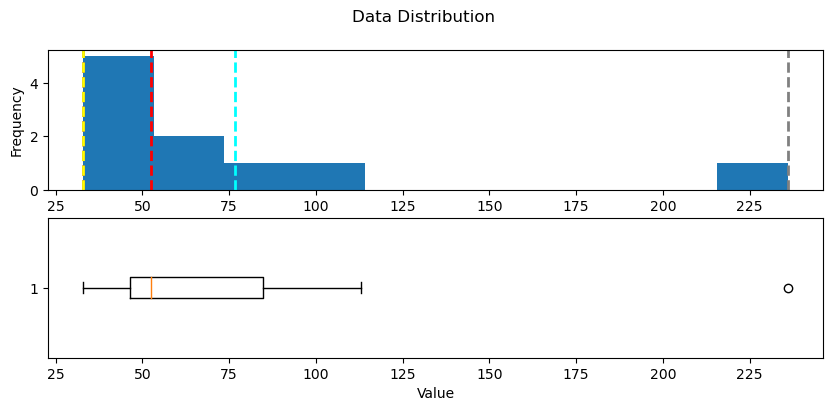

In [65]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))
    
    # Plot the histogram 
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'purple', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot 
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the Figure
    fig.suptitle('Data Distribution')
    
    # Show the figure
    fig.show()

show_distribution(df['Death'])

Comments:
* The yellow dash vertical line signifies mode(most occurrence) rate of death
* The dashed vertical red line signifies median(middle) rate of death
* The dashed vertical cyan line signifies mean rate of death
* The dashed vertical red line signifies median(middle) rate of death
* The dashed vertical purple line signifies least rate of death
* The dashed vertical gray line signifies highest rate of death

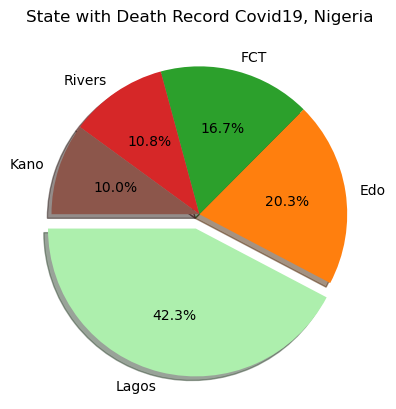

In [66]:
death = df["Death"].head()
state = df["States"].head()
colors = ["#adefad", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(death, labels=state, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("State with Death Record Covid19, Nigeria")
plt.show()

Comment:
* Lagos recorded the highest death of 42.3% follow by Edo with 20.3% while Kano has the least record of 10%
* Therefore it is unsafe to live in Lagos 

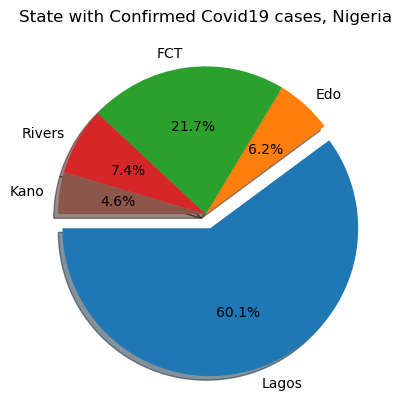

In [67]:
confirm = df["Confirmed cases"].head()
state = df["States"].head()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(confirm, labels=state, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("State with Confirmed Covid19 cases, Nigeria")
plt.show()

Comment:Base on the Pie Chart shown above

- Lagos has the highest confirmed case record of 60.1% follow by FCT with 21.7% while Kano has the least confirmed case record
* Conclusion:
- Covid19 virus tends to spread more in Lagos than any other state in Nigeria
- It is more safe to live in Kano than in Lagos.    

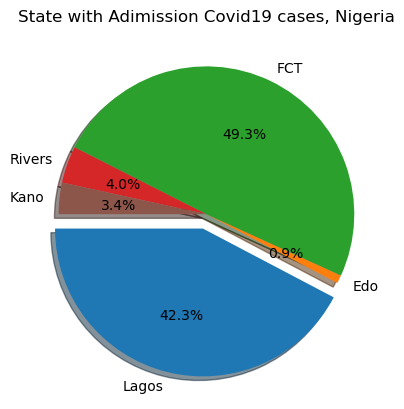

In [68]:
admitted = df["Admitted cases"].head()
state = df["States"].head()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(admitted, labels=state, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("State with Adimission Covid19 cases, Nigeria")
plt.show()

Comment:
* Abuja has the highest number of admitted case record of 49.3% follow by Lagos with 42.3%% while Edo has the minimum number of admitted case record of 0.9%    

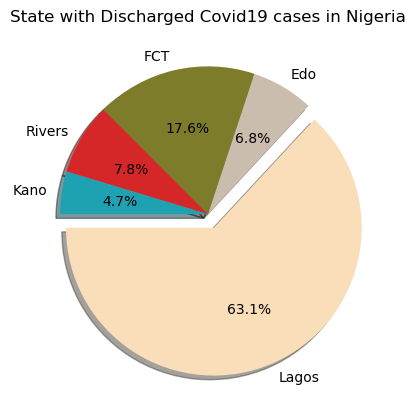

In [69]:
recover = df["Recovered cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(recover, labels=state, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("State with Discharged Covid19 cases in Nigeria")
plt.show()

Comment:
* Lagos is the state with the highest record of discharged with 63.1% follow by FCT with 17.6% while Kano has the least record of discharged record

Comment:
* Confirmed cases and Admitted cases are not perfectly correlation meaning there is a difference between the two columns

<AxesSubplot:xlabel='Admitted cases', ylabel='Count'>

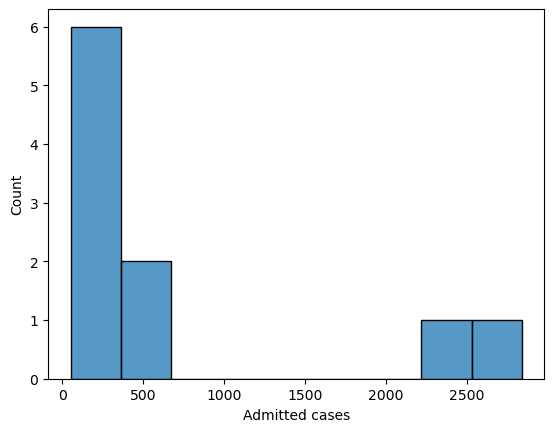

In [70]:
#Histogram to show the methods of payment
sns.histplot(data=df, x = 'Admitted cases')

In [71]:
df = df['Admitted cases'] == 1500
df.sum()

0

## Summary

I learnt how to perform Exploratory Data Analysis (EDA) 
in Python and how to use external Python libraries like Pandas, Numpy, Matplotlib, Seaborn etc.
to conduct univariate analysis, bivariate analysis and data visualization.

# Conclusion
The main purpose of this project to demonstrate various pandas functions that help us analyze tabular data. The parameters of pandas functions are highly important as they make the functions more powerful and versatile. Thus, it is very important to know what parameters achieve. One of the things I like about pandas is that there are almost always more than one way to accomplish a task. For instance, what we have done in the project can also be done in a different way. In fact, you may challenge yourself to do the same using different functions.